# Documentation
This notebook covers some cleaning on the dataset, EDA and Data Visualization

**EDA:**

*    info on the dataset, number of rows-columns, type of dataset, null values in the dataset
*   Changing the categorical column- *launch_stage*, *revenue_stage* and *activity_level* to specific numerical values.
*   EDA using *Pandas Profiling*

**Visualization:**

*   A bar graph shows the number of twitter followers in each state
*   A bar graph depicts the number of startups a state has initiated
*   A bar graph shows how many page views a startup has had
*   A bar graph shows the number of startups founded in a particular year
*  Visualize the number of missing values in each column using heatmap
*   A scatter plot showing relation between Twitter followers and the number of pageviews
*   A bar chart showing top 10 cities with highest number of startups





In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd

path = "/content/drive/MyDrive/Omdena/startup_tracker_io.csv"
df = pd.read_csv(path)

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# EDA


In [6]:
df.head()

,description,website,crunchbase_link,name,activity_level,market,products,revenue_through,founded_by,founded,place,team_members,launch_stage,revenue_stage,amount_raised,twitter_followers,percentile,pageviews,Alexa Ranking,Unnamed: 19
0,'#1 Social Justice Network: Civil Rights Tools...,https://www.reyets.com/links?ref=startuptracker,https://crunchbase.com/organization/reyets,'Reyets: Social Justice Network',High company activity detected,"'education', 'governmental', 'social networks'...","'mobile app', 'service', 'web app'","'b2c', 'b2b', 'b2g', 'non profit', 'free to us...","""Wa'il Ashshowwaf"", 'Justin A. Moore, ESQ.', '...",June 30 2017,"Washington, DC US",4,Publicly,Pre,$200k,618,9,~995,4.7m,NaN
1,'A Better Business Dashboard For Founders And ...,https://benchmark.app?ref=startuptracker,https://startuptracker.io,'Benchmark App',Low company activity detected,"'analytics', 'data', 'startups'",'web app',"'b2b', 'freemium'",'Daren@hey.com \U0001f9ed',June 30 2020,"Provo, UT US",2,Pre,Pre,Undisclosed,1,9,~2.1k,2.3m,NaN
2,'Story-driven online courses in game format fo...,https://edcraft.io?ref=startuptracker,https://crunchbase.com/organization/edcraft,'EdCraft',Sourced by Startup Tracker,'education',"'service', 'web app'","'b2c', 'b2b', 'freemium'",'Umnazia',September 1 2018,New York US,11-50,Publicly,Post,$1m,See,9,~1.3k,3.5m,NaN
3,'Net Worth and Investments Tracker',https://www.moneyminx.com?ref=startuptracker,https://betalist.com/startups/money-minx,'Money Minx',High company activity detected,'finance','web app',"'b2c', 'subscription'","'Hussein Yahfoufi 🌟', 'Jessica (Jones) Yahfoufi'",January 1 2021,San Diego US,5-10,Publicly,Pre,Undisclosed,62,9,~6.7k,705.9k,NaN
4,'Finance for Founders',https://pry.co?ref=startuptracker,https://producthunt.com/posts/pry,'Pry',High company activity detected,"'analytics', 'finance', 'startups', 'accountin...","'service', 'web app'","'b2b', 'subscription'",'Tiffany Wong',June 9 2017,San Francisco US,5-10,Publicly,Post,Undisclosed,170,9,~16k,297.3k,NaN


In [7]:
#unnecessary column
del df['Unnamed: 19']

In [8]:
df

,description,website,crunchbase_link,name,activity_level,market,products,revenue_through,founded_by,founded,place,team_members,launch_stage,revenue_stage,amount_raised,twitter_followers,percentile,pageviews,Alexa Ranking
0,'#1 Social Justice Network: Civil Rights Tools...,https://www.reyets.com/links?ref=startuptracker,https://crunchbase.com/organization/reyets,'Reyets: Social Justice Network',High company activity detected,"'education', 'governmental', 'social networks'...","'mobile app', 'service', 'web app'","'b2c', 'b2b', 'b2g', 'non profit', 'free to us...","""Wa'il Ashshowwaf"", 'Justin A. Moore, ESQ.', '...",June 30 2017,"Washington, DC US",4,Publicly,Pre,$200k,618,9,~995,4.7m
1,'A Better Business Dashboard For Founders And ...,https://benchmark.app?ref=startuptracker,https://startuptracker.io,'Benchmark App',Low company activity detected,"'analytics', 'data', 'startups'",'web app',"'b2b', 'freemium'",'Daren@hey.com \U0001f9ed',June 30 2020,"Provo, UT US",2,Pre,Pre,Undisclosed,1,9,~2.1k,2.3m
2,'Story-driven online courses in game format fo...,https://edcraft.io?ref=startuptracker,https://crunchbase.com/organization/edcraft,'EdCraft',Sourced by Startup Tracker,'education',"'service', 'web app'","'b2c', 'b2b', 'freemium'",'Umnazia',September 1 2018,New York US,11-50,Publicly,Post,$1m,See,9,~1.3k,3.5m
3,'Net Worth and Investments Tracker',https://www.moneyminx.com?ref=startuptracker,https://betalist.com/startups/money-minx,'Money Minx',High company activity detected,'finance','web app',"'b2c', 'subscription'","'Hussein Yahfoufi 🌟', 'Jessica (Jones) Yahfoufi'",January 1 2021,San Diego US,5-10,Publicly,Pre,Undisclosed,62,9,~6.7k,705.9k
4,'Finance for Founders',https://pry.co?ref=startuptracker,https://producthunt.com/posts/pry,'Pry',High company activity detected,"'analytics', 'finance', 'startups', 'accountin...","'service', 'web app'","'b2b', 'subscription'",'Tiffany Wong',June 9 2017,San Francisco US,5-10,Publicly,Post,Undisclosed,170,9,~16k,297.3k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,'Libris teaches children to read by reading bo...,https://libris.app?ref=startuptracker,https://startuptracker.io,'Libris',No recent company activity detected,'education','web app',"'b2c', 'free to use'",'librisapp',March 15 2019,Berkeley US,2,Privately,Pre,Self,6,9,6,0
309,'Chisel Analytics provides an on demand analyt...,https://chiselanalytics.com?ref=startuptracker,https://angel.co/chisel-analytics,'Chisel Analytics',No recent company activity detected,"'analytics', 'consulting', 'data'","'desktop app', 'service', 'web app'","'b2b', 'b2g', 'other', 'freemium'",'Chisel Analytics',April 15 2019,Dallas US,1,Privately,Pre,Undisclosed,78,9,~1.5k,3m
310,'Largest community-curated collection of natur...,http://hempesphere.com/?ref=startuptracker,https://www.crunchbase.com/organization/hempes...,'hempesphere',No recent company activity detected,"'advertising', 'food and beverages', 'health',...",'web app',"'other', 'b2c', 'free to use', 'affiliation'",'Masha',March 1 2019,Chicago US,2,Publicly,Pre,Self,79,9,79,0
311,'Web and mobile app development using latest t...,https://vanila.io?ref=startuptracker,https://angel.co/vanila-web-studio,'Vanila.io',High company activity detected,"'design', 'e commerce', 'startups', 'bots'","'mobile app', 'service', 'web app'","'b2b', 'sales'","'Stefan Smiljkovic', 'Jelena Jovanovic'",September 15 2015,New Smyrna Beach US,5-10,Publicly,Post,Undisclosed,4.9k,9,~6.7k,705.7k


In [9]:
#the dataset has 313 rows and 19 columns
df.shape

(313, 19)

In [10]:
df.columns.values

array(['description', 'website', 'crunchbase_link', 'name',
       'activity_level', 'market', 'products', 'revenue_through',
       'founded_by', 'founded', 'place', 'team_members', 'launch_stage',
       'revenue_stage', 'amount_raised', 'twitter_followers',
       'percentile', 'pageviews', 'Alexa Ranking'], dtype=object)

In [11]:
df.info

<bound method DataFrame.info of                                            description  ... Alexa Ranking
0    '#1 Social Justice Network: Civil Rights Tools...  ...          4.7m
1    'A Better Business Dashboard For Founders And ...  ...          2.3m
2    'Story-driven online courses in game format fo...  ...          3.5m
3                  'Net Worth and Investments Tracker'  ...        705.9k
4                               'Finance for Founders'  ...        297.3k
..                                                 ...  ...           ...
308  'Libris teaches children to read by reading bo...  ...             0
309  'Chisel Analytics provides an on demand analyt...  ...            3m
310  'Largest community-curated collection of natur...  ...             0
311  'Web and mobile app development using latest t...  ...        705.7k
312  'KOYA pairs kindness and connection to create ...  ...        247.4k

[313 rows x 19 columns]>

In [12]:
df.dtypes

description          object
website              object
crunchbase_link      object
name                 object
activity_level       object
market               object
products             object
revenue_through      object
founded_by           object
founded              object
place                object
team_members         object
launch_stage         object
revenue_stage        object
amount_raised        object
twitter_followers    object
percentile           object
pageviews            object
Alexa Ranking        object
dtype: object

In [13]:
df.describe()

,description,website,crunchbase_link,name,activity_level,market,products,revenue_through,founded_by,founded,place,team_members,launch_stage,revenue_stage,amount_raised,twitter_followers,percentile,pageviews,Alexa Ranking
count,313,313,313,313,313,313,313,313,254,312,313,313,313,313,313,313,313,313,313
unique,313,313,220,312,6,231,31,111,246,190,153,12,5,3,22,173,2,164,150
top,"'With a swift scan using their camera, your ne...",https://www.liist.cc?ref=startuptracker,https://startuptracker.io,'Mooditude',High company activity detected,'advertising','service',"'b2b', 'subscription'",'Applewild School',January 2 1988,New York US,5-10,Publicly,Pre,Undisclosed,9,9,0,0
freq,1,1,85,2,154,26,75,31,7,35,36,97,219,264,223,41,312,53,110


In [14]:
import numpy as np

# figuring numeric columns
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

# figuring non numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

[]
['description' 'website' 'crunchbase_link' 'name' 'activity_level'
 'market' 'products' 'revenue_through' 'founded_by' 'founded' 'place'
 'team_members' 'launch_stage' 'revenue_stage' 'amount_raised'
 'twitter_followers' 'percentile' 'pageviews' 'Alexa Ranking']


In [15]:
#percentage of null values in each column
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

description - 0%
website - 0%
crunchbase_link - 0%
name - 0%
activity_level - 0%
market - 0%
products - 0%
revenue_through - 0%
founded_by - 19%
founded - 0%
place - 0%
team_members - 0%
launch_stage - 0%
revenue_stage - 0%
amount_raised - 0%
twitter_followers - 0%
percentile - 0%
pageviews - 0%
Alexa Ranking - 0%


In [16]:
#This is the only column with NaN values, as these are real data values, didn't deal with NaN value.
df['founded_by'].unique()


array(['"Wa\'il Ashshowwaf", \'Justin A. Moore, ESQ.\', \'Rooam\'',
       "'Daren@hey.com \\U0001f9ed'", "'Umnazia'",
       "'Hussein Yahfoufi 🌟', 'Jessica (Jones) Yahfoufi'",
       "'Tiffany Wong'", "'Chai Meet Biscuit'", nan, "'Oliver Grand'",
       "'Global Fun'", "'Lean Power'", "'True Reply', 'oneQube'",
       "'SocialMeep'", "'DesignerUp'", "'strategynode', 'Tyler J. Fox'",
       "'Rad Padre', 'Freedom TV+ (Streaming on Roku & Amazon Fire TV)'",
       "'VyrocApp'", "'Chris Beaman'", "'Snipply'", "'Angshuman Guha'",
       "'agreemint'", "'Shake SDK'", "'Deskle'",
       "'Shannon S', 'PayLoadz'", "'Mooditude App'", "'WatchTowerHQ'",
       "'nullbox'", "'Email2Go'", "'Nishant', 'DigsFact', 'DigsFact LLC'",
       "'Smartbate'", "'Ryan Hitchler'", "'tribe'", "'Malcolm Woods'",
       "'Bryan Grey'", "'GoCRM'", "'David Wilmot'", "'Fahim Karim'",
       "'poolmarketing'", "'Alex Edmonds🎙️'", "'Memorize'",
       "'Cenports Commerce'", "'Fortunesoft'", "'Keeper Tax'",
       '

In [18]:
df['revenue_stage'].unique()

array(['Pre', 'Post', 'Publicly'], dtype=object)

In [19]:
#changing the string values in 'revenue_stage' to numeric value
df['revenue_stage'].replace({"Pre": "1", "Post": "2", "Publicly": "3"}, inplace=True)


In [20]:
df['launch_stage'].replace({"51-100": "Publicly", "1": "Publicly"}, inplace=True)

In [21]:
df['launch_stage'].unique()

array(['Publicly', 'Pre', 'Privately'], dtype=object)

In [22]:
df['activity_level'].unique()

array(['High company activity detected', 'Low company activity detected',
       'Sourced by Startup Tracker',
       'No recent company activity detected', "'Instabug'",
       "'Simple Quarters - We Buy Houses Indianapolis'"], dtype=object)

In [24]:
df['activity_level'].value_counts()

High company activity detected                    154
No recent company activity detected               118
Low company activity detected                      23
Sourced by Startup Tracker                         16
'Simple Quarters - We Buy Houses Indianapolis'      1
'Instabug'                                          1
Name: activity_level, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Activity Level of Startups')

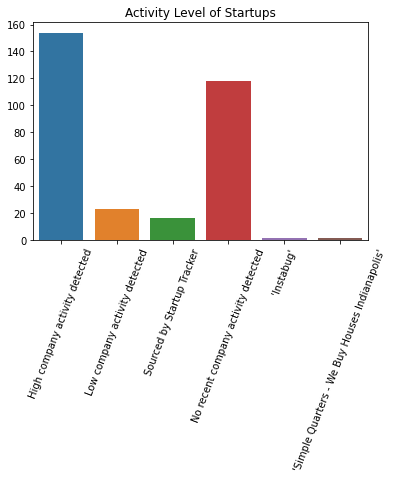

In [23]:
d = {}
for i in df['activity_level'].unique():
    
    d[i] = len(df.loc[df['activity_level']==i])
sns.barplot([i for i in d.keys()],[i for i in d.values()])
plt.xticks(rotation=69)
plt.title('Activity Level of Startups')

In [25]:
#changing the string values in 'activity_level' to numeric value
df['activity_level'].replace({"High company activity detected": "1", "Low company activity detected": "2", "Sourced by Startup Tracker": "3", "No recent company activity detected": "4", "Instabug": "5", "Simple Quarters - We Buy Houses Indianapolis": "6"}, inplace=True)

In [26]:
df

,description,website,crunchbase_link,name,activity_level,market,products,revenue_through,founded_by,founded,place,team_members,launch_stage,revenue_stage,amount_raised,twitter_followers,percentile,pageviews,Alexa Ranking
0,'#1 Social Justice Network: Civil Rights Tools...,https://www.reyets.com/links?ref=startuptracker,https://crunchbase.com/organization/reyets,'Reyets: Social Justice Network',1,"'education', 'governmental', 'social networks'...","'mobile app', 'service', 'web app'","'b2c', 'b2b', 'b2g', 'non profit', 'free to us...","""Wa'il Ashshowwaf"", 'Justin A. Moore, ESQ.', '...",June 30 2017,"Washington, DC US",4,Publicly,1,$200k,618,9,~995,4.7m
1,'A Better Business Dashboard For Founders And ...,https://benchmark.app?ref=startuptracker,https://startuptracker.io,'Benchmark App',2,"'analytics', 'data', 'startups'",'web app',"'b2b', 'freemium'",'Daren@hey.com \U0001f9ed',June 30 2020,"Provo, UT US",2,Pre,1,Undisclosed,1,9,~2.1k,2.3m
2,'Story-driven online courses in game format fo...,https://edcraft.io?ref=startuptracker,https://crunchbase.com/organization/edcraft,'EdCraft',3,'education',"'service', 'web app'","'b2c', 'b2b', 'freemium'",'Umnazia',September 1 2018,New York US,11-50,Publicly,2,$1m,See,9,~1.3k,3.5m
3,'Net Worth and Investments Tracker',https://www.moneyminx.com?ref=startuptracker,https://betalist.com/startups/money-minx,'Money Minx',1,'finance','web app',"'b2c', 'subscription'","'Hussein Yahfoufi 🌟', 'Jessica (Jones) Yahfoufi'",January 1 2021,San Diego US,5-10,Publicly,1,Undisclosed,62,9,~6.7k,705.9k
4,'Finance for Founders',https://pry.co?ref=startuptracker,https://producthunt.com/posts/pry,'Pry',1,"'analytics', 'finance', 'startups', 'accountin...","'service', 'web app'","'b2b', 'subscription'",'Tiffany Wong',June 9 2017,San Francisco US,5-10,Publicly,2,Undisclosed,170,9,~16k,297.3k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,'Libris teaches children to read by reading bo...,https://libris.app?ref=startuptracker,https://startuptracker.io,'Libris',4,'education','web app',"'b2c', 'free to use'",'librisapp',March 15 2019,Berkeley US,2,Privately,1,Self,6,9,6,0
309,'Chisel Analytics provides an on demand analyt...,https://chiselanalytics.com?ref=startuptracker,https://angel.co/chisel-analytics,'Chisel Analytics',4,"'analytics', 'consulting', 'data'","'desktop app', 'service', 'web app'","'b2b', 'b2g', 'other', 'freemium'",'Chisel Analytics',April 15 2019,Dallas US,1,Privately,1,Undisclosed,78,9,~1.5k,3m
310,'Largest community-curated collection of natur...,http://hempesphere.com/?ref=startuptracker,https://www.crunchbase.com/organization/hempes...,'hempesphere',4,"'advertising', 'food and beverages', 'health',...",'web app',"'other', 'b2c', 'free to use', 'affiliation'",'Masha',March 1 2019,Chicago US,2,Publicly,1,Self,79,9,79,0
311,'Web and mobile app development using latest t...,https://vanila.io?ref=startuptracker,https://angel.co/vanila-web-studio,'Vanila.io',1,"'design', 'e commerce', 'startups', 'bots'","'mobile app', 'service', 'web app'","'b2b', 'sales'","'Stefan Smiljkovic', 'Jelena Jovanovic'",September 15 2015,New Smyrna Beach US,5-10,Publicly,2,Undisclosed,4.9k,9,~6.7k,705.7k


In [27]:
#removing ~ sign from the pageviews column
df['pageviews'] = df['pageviews'].map(lambda x: x.lstrip('~').rstrip('aAbBcC'))

In [28]:
#removing $ sign from the amount_raised column
df['amount_raised'] = df['amount_raised'].map(lambda x: x.lstrip('$').rstrip('aAbBcC'))

In [29]:
#removing single quotes from the string values from the columns
for i, col in enumerate(df.columns):
    df.iloc[:, i] = df.iloc[:, i].str.replace("'", "")

In [30]:
df

,description,website,crunchbase_link,name,activity_level,market,products,revenue_through,founded_by,founded,place,team_members,launch_stage,revenue_stage,amount_raised,twitter_followers,percentile,pageviews,Alexa Ranking
0,"#1 Social Justice Network: Civil Rights Tools,...",https://www.reyets.com/links?ref=startuptracker,https://crunchbase.com/organization/reyets,Reyets: Social Justice Network,1,"education, governmental, social networks, star...","mobile app, service, web app","b2c, b2b, b2g, non profit, free to use, advert...","""Wail Ashshowwaf"", Justin A. Moore, ESQ., Rooam",June 30 2017,"Washington, DC US",4,Publicly,1,200k,618,9,995,4.7m
1,A Better Business Dashboard For Founders And C...,https://benchmark.app?ref=startuptracker,https://startuptracker.io,Benchmark App,2,"analytics, data, startups",web app,"b2b, freemium",Daren@hey.com \U0001f9ed,June 30 2020,"Provo, UT US",2,Pre,1,Undisclosed,1,9,2.1k,2.3m
2,Story-driven online courses in game format for...,https://edcraft.io?ref=startuptracker,https://crunchbase.com/organization/edcraft,EdCraft,3,education,"service, web app","b2c, b2b, freemium",Umnazia,September 1 2018,New York US,11-50,Publicly,2,1m,See,9,1.3k,3.5m
3,Net Worth and Investments Tracker,https://www.moneyminx.com?ref=startuptracker,https://betalist.com/startups/money-minx,Money Minx,1,finance,web app,"b2c, subscription","Hussein Yahfoufi 🌟, Jessica (Jones) Yahfoufi",January 1 2021,San Diego US,5-10,Publicly,1,Undisclosed,62,9,6.7k,705.9k
4,Finance for Founders,https://pry.co?ref=startuptracker,https://producthunt.com/posts/pry,Pry,1,"analytics, finance, startups, accounting and l...","service, web app","b2b, subscription",Tiffany Wong,June 9 2017,San Francisco US,5-10,Publicly,2,Undisclosed,170,9,16k,297.3k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,Libris teaches children to read by reading boo...,https://libris.app?ref=startuptracker,https://startuptracker.io,Libris,4,education,web app,"b2c, free to use",librisapp,March 15 2019,Berkeley US,2,Privately,1,Self,6,9,6,0
309,Chisel Analytics provides an on demand analyti...,https://chiselanalytics.com?ref=startuptracker,https://angel.co/chisel-analytics,Chisel Analytics,4,"analytics, consulting, data","desktop app, service, web app","b2b, b2g, other, freemium",Chisel Analytics,April 15 2019,Dallas US,1,Privately,1,Undisclosed,78,9,1.5k,3m
310,Largest community-curated collection of natura...,http://hempesphere.com/?ref=startuptracker,https://www.crunchbase.com/organization/hempes...,hempesphere,4,"advertising, food and beverages, health, marke...",web app,"other, b2c, free to use, affiliation",Masha,March 1 2019,Chicago US,2,Publicly,1,Self,79,9,79,0
311,Web and mobile app development using latest te...,https://vanila.io?ref=startuptracker,https://angel.co/vanila-web-studio,Vanila.io,1,"design, e commerce, startups, bots","mobile app, service, web app","b2b, sales","Stefan Smiljkovic, Jelena Jovanovic",September 15 2015,New Smyrna Beach US,5-10,Publicly,2,Undisclosed,4.9k,9,6.7k,705.7k


In [31]:
#removing $ sign from the twitter_followers column
df['twitter_followers'] = df['twitter_followers'].map(lambda x: x.lstrip('$').rstrip('aAbBcC'))

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

     |████████████████████████████████| 34.6MB 87kB/s 
     |████████████████████████████████| 10.1MB 3.9MB/s 
     |████████████████████████████████| 645kB 40.0MB/s 
     |████████████████████████████████| 112kB 40.1MB/s 
     |████████████████████████████████| 1.1MB 32.3MB/s 
     |████████████████████████████████| 3.1MB 32.4MB/s 
     |████████████████████████████████| 61kB 6.2MB/s 
     |████████████████████████████████| 81kB 7.3MB/s 
     |████████████████████████████████| 296kB 30.1MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.0.0-py2.py3-none-any.whl size=248525 sha256=3e539e1e21aed877bc7f3c6376d8f7a35fad538fc28bf2f47c5926ec23520d63
  Stored in directory: /tmp/pip-ephem-wheel-cache-qxeig013/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27099 sha256=58f29eba4a695f18fd4c230c0afbf80b8185113a292486099c2194832ddaf98c
  Stored in directory: /root/.cache/pip/wheels

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
profile = ProfileReport(df, title="Startup Tracker IO", html={'style':{'full_width': True}})

In [ ]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/32 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# VISUALIZATION

In [ ]:
# This graph shows the number of twitter followers in each state
import plotly.express as px

fig = px.bar(df,y='twitter_followers',x='place',orientation='v',title = "Number of Twitter Followers by State", width= 10000, height=500)
fig.show()


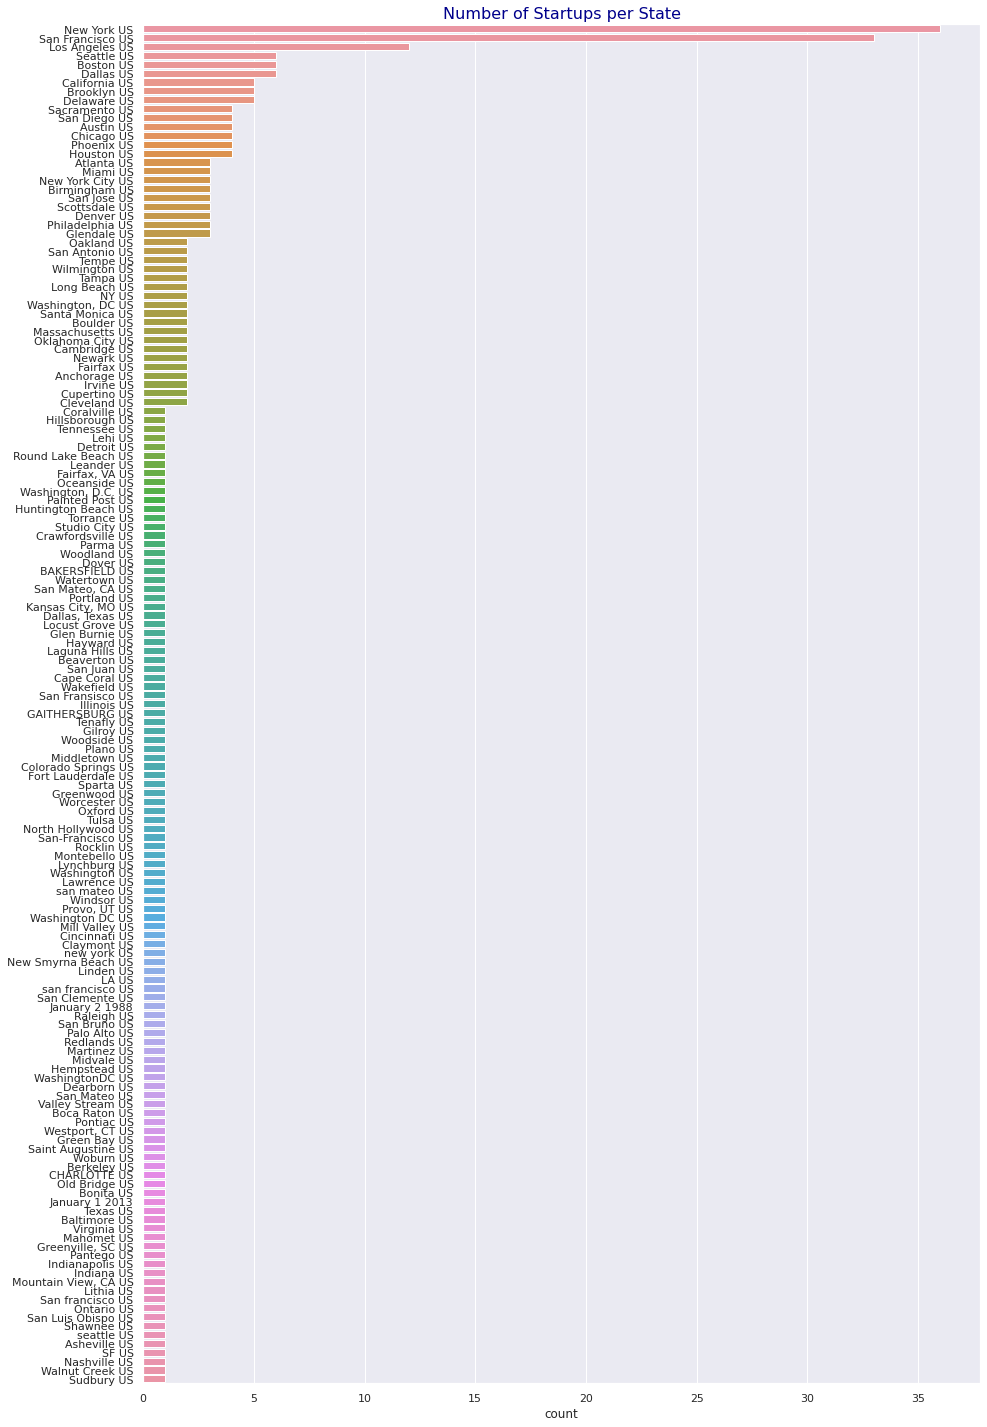

In [ ]:
# This graph depicts the number of startups a state has initiated
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,25))
sns.countplot(y='place',data=df,ax=ax,order=df.place.value_counts().index)
plt.title('Number of Startups per State',fontsize=16,color='DarkBlue')
plt.ylabel(None)
plt.show()

In [ ]:
# This graph shows how many page views a startup has had

import plotly.express as px

fig = px.bar(df,y='pageviews',x='name',orientation='v',title = "Number of Page Views by Startup", width=10000, height=500)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.show()


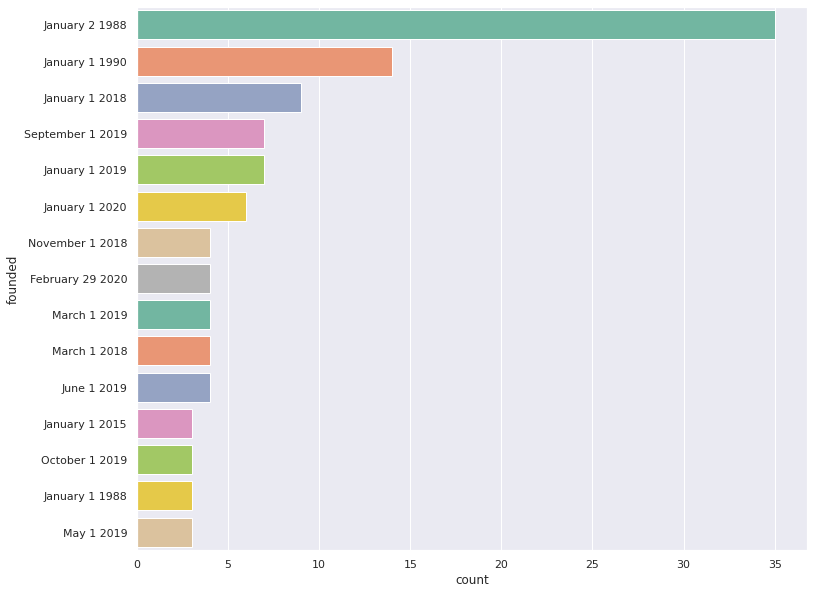

In [ ]:
# This graph shows the number of startups founded in a particular year

plt.figure(figsize=(12,10))
df = df.sort_values(by=['founded'])
df
sns.set(style="darkgrid")
ax = sns.countplot(y="founded", data=df, palette="Set2", order=df['founded'].value_counts().index[0:15])

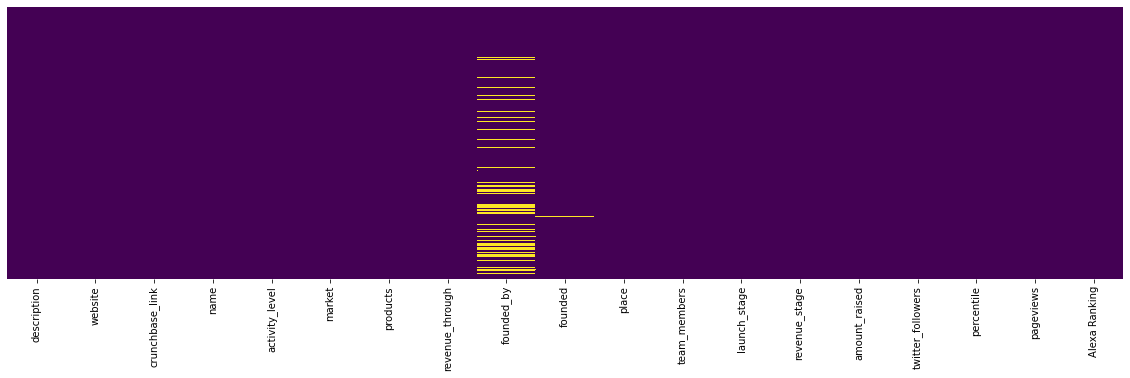

In [ ]:
# Visualize the number of missing values in each column
fig,axes = plt.subplots(1,1,figsize=(20,5))
sns.heatmap(df.isna(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

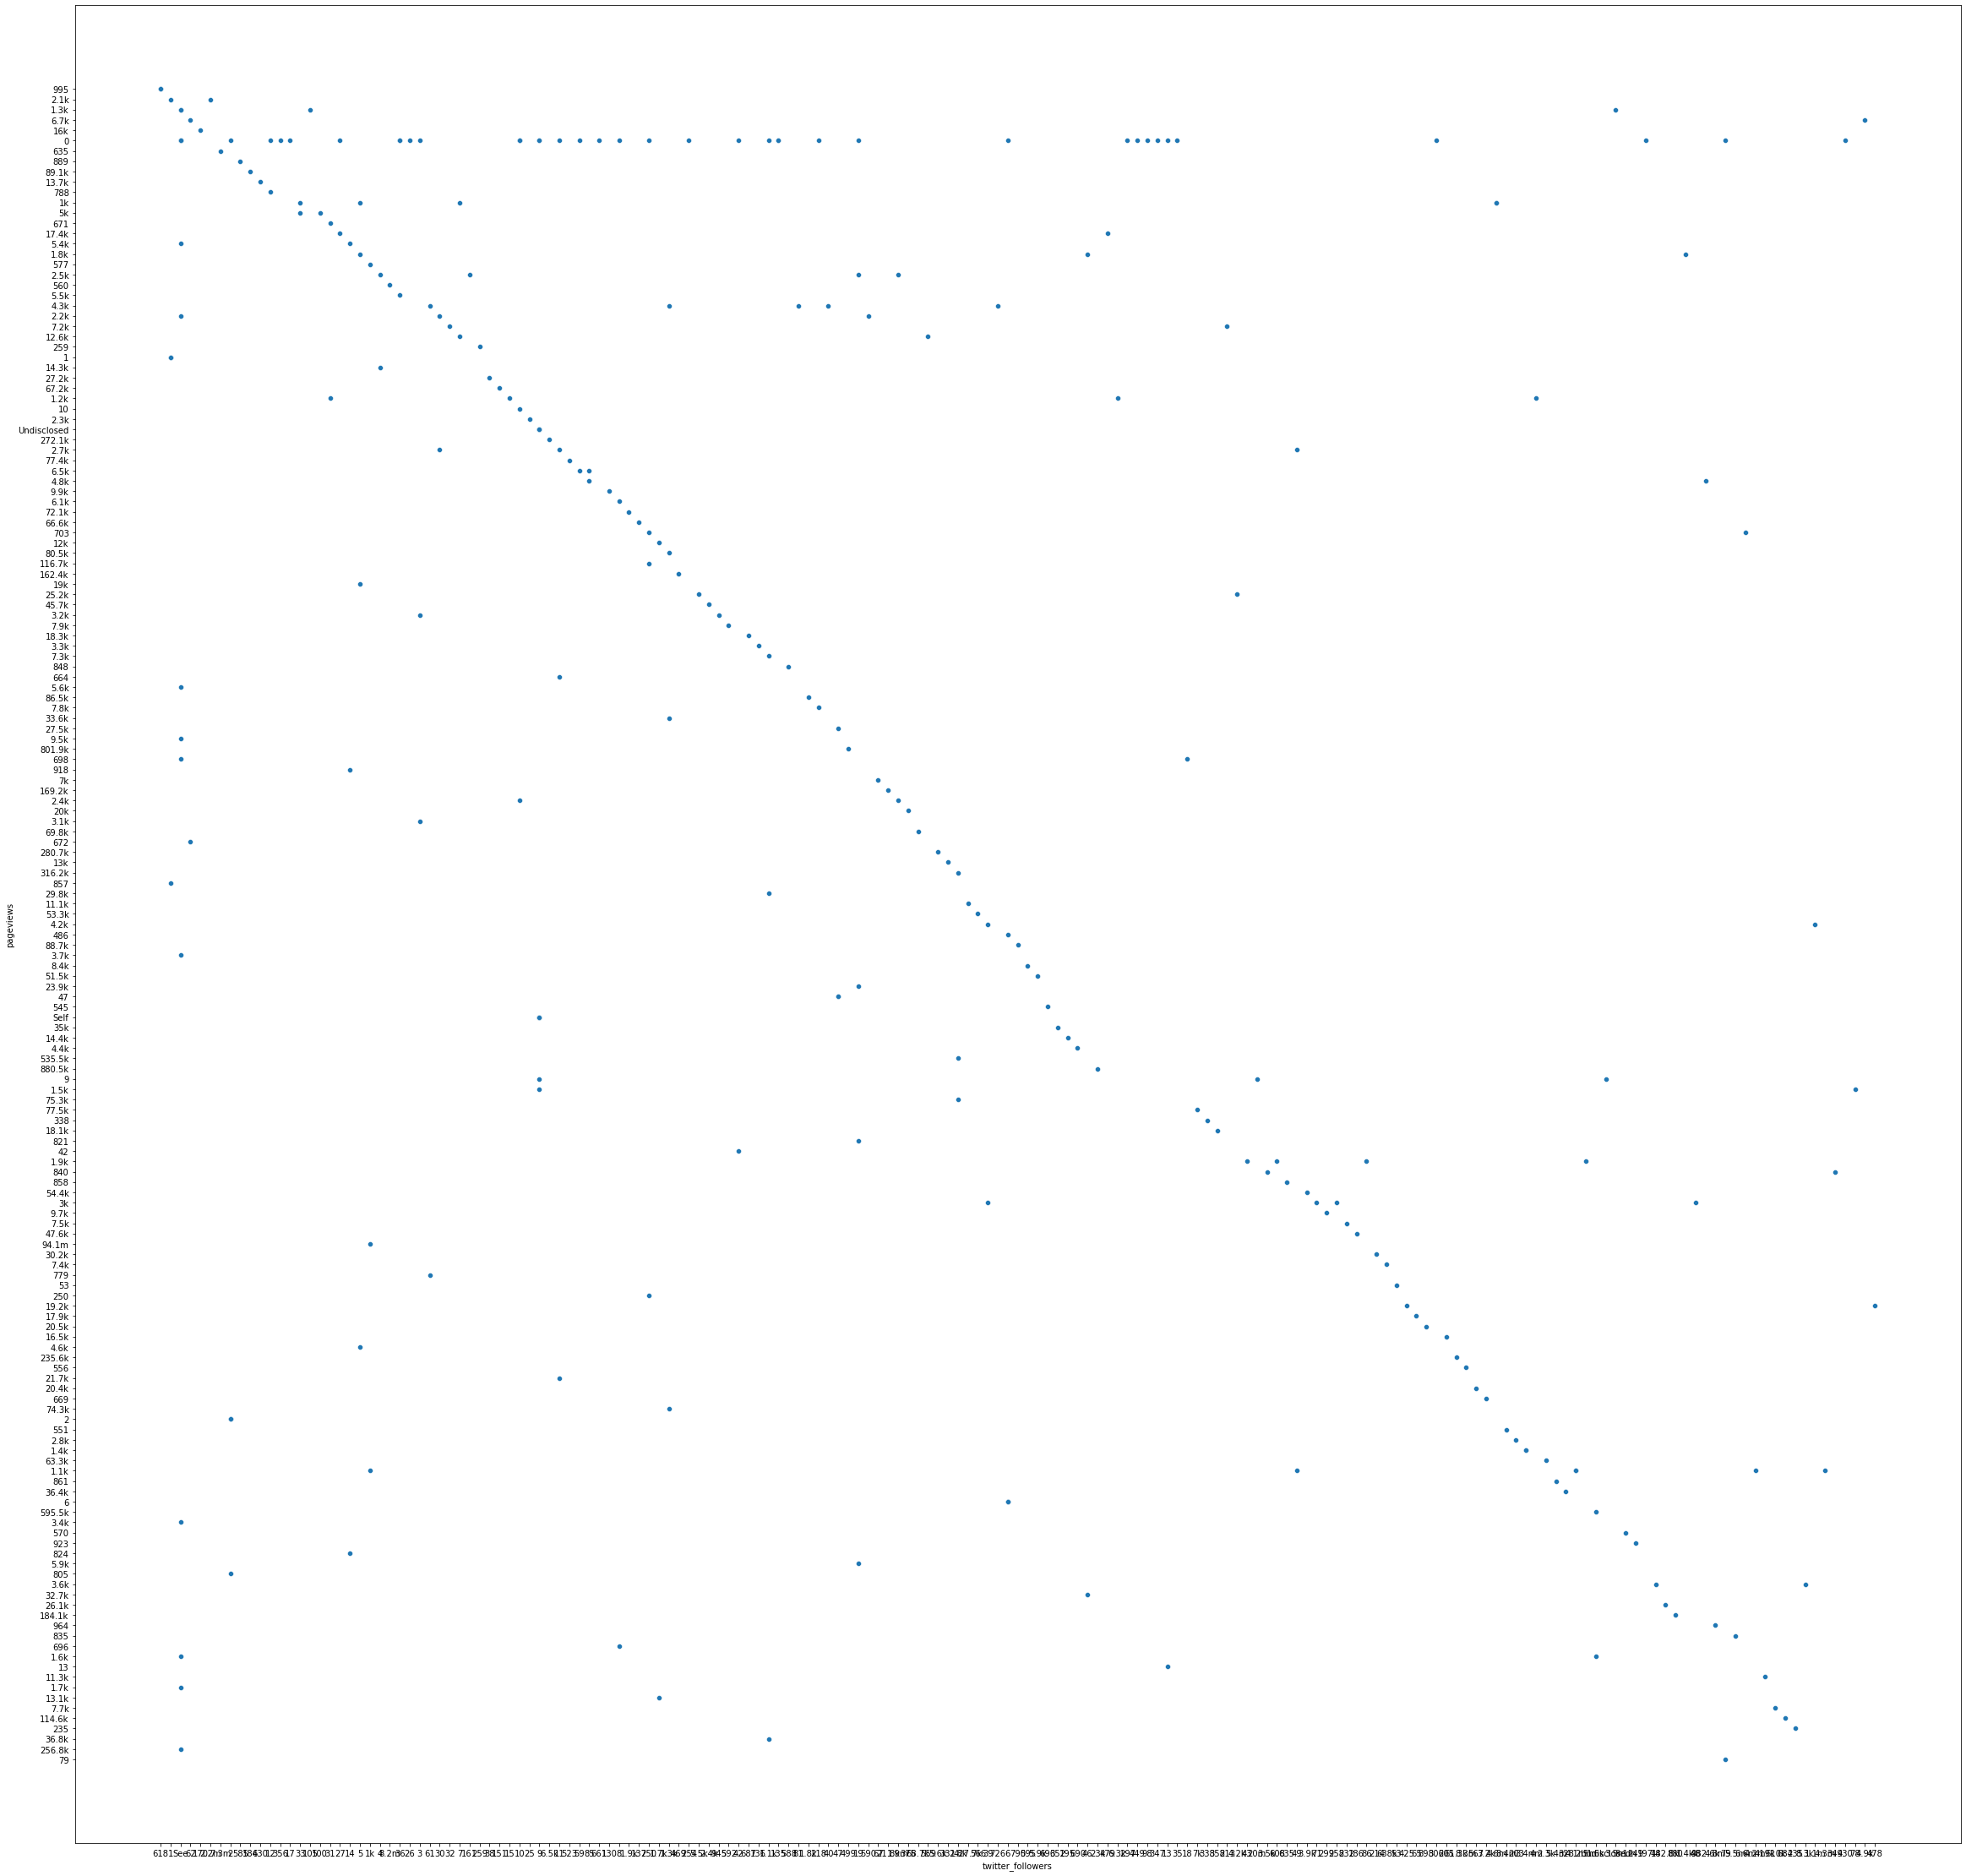

In [37]:
#A scatter plot showing relation between Twitter followers and the number of pageviews
fig = plt.gcf()
fig.set_size_inches(40, 40)

sns.scatterplot(x=df['twitter_followers'], 
                y=df['pageviews'], 
                data=df)

In [39]:
df['place'].value_counts()[:10]

New York US         36
San Francisco US    33
Los Angeles US      12
Boston US            6
Dallas US            6
Seattle US           6
Delaware US          5
California US        5
Brooklyn US          5
Houston US           4
Name: place, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Startups by City')

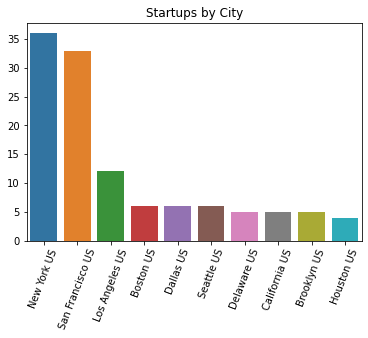

In [40]:
# A bar chart showing number of startups in a city
sns.barplot(df['place'].value_counts().nlargest(10).index,list(df['place'].value_counts().nlargest(10)))
plt.xticks(rotation=69)
plt.title('Startups by City')